## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
x,y = mnist['data'], mnist['target']
x.info

<bound method DataFrame.info of        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0

In [5]:
%matplotlib inline

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
import numpy as np
some_digit = np.array(x.iloc[36005])
some_digit_image = np.reshape(some_digit, (28, 28))

(-0.5, 27.5, 27.5, -0.5)

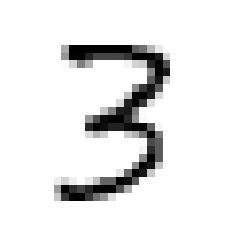

In [8]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis('off')

In [9]:
x_train, x_test = x[:60000], x[60000:]

In [10]:
y_train, y_test = y[:60000], y[60000:]

In [11]:
import numpy as np
shuffled_index = np.random.permutation(60000)
x_train = x_train.sample(frac=1).reset_index(drop=True)

## Creating a 2 detector

In [12]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_3 = (y_train==3)
y_test_3 = (y_test==3)

In [13]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [14]:
clf.fit(x_train, y_train_3)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [15]:
clf.predict([some_digit])

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [16]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf, x_train, y_train_3, cv=3, scoring='accuracy')

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [17]:
a.mean()

0.7693333333333333

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_3, cv=3)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [19]:
y_train_pred

array([False, False, False, ..., False,  True, False])

## Calculating confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_train_3, y_train_pred)

array([[51153,  2716],
       [ 5831,   300]], dtype=int64)

In [22]:
#Ideal Confusion Matrix
confusion_matrix(y_train_3, y_train_3)

array([[53869,     0],
       [    0,  6131]], dtype=int64)

## Precision & Recall

In [23]:
from sklearn.metrics import precision_score, recall_score

In [24]:
precision_score(y_train_3, y_train_pred)

0.09946949602122016

In [25]:
recall_score(y_train_3, y_train_pred)

0.04893165878323275

## F-1 Score

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_train_3, y_train_pred)

0.06559527714004593

## Precision-Recall curve

In [28]:
from sklearn.metrics import precision_recall_curve

In [29]:
y_scores = cross_val_predict(clf, x_train, y_train_3, cv=3, method = 'decision_function')

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [30]:
y_scores

array([-454336.56738285, -352983.32681947, -578357.4331583 , ...,
        -68653.70635287,    2292.41775721, -108859.18001194])

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

In [32]:
precisions

array([0.10219185, 0.10217688, 0.10216192, ..., 0.5       , 0.        ,
       1.        ])

In [33]:
recalls

array([1.00000000e+00, 9.99836894e-01, 9.99673789e-01, ...,
       1.63105529e-04, 0.00000000e+00, 0.00000000e+00])

In [34]:
thresholds

array([-971806.25628678, -961531.92656375, -958649.57391522, ...,
        203297.64663894,  246750.80027087,  251499.3313581 ])

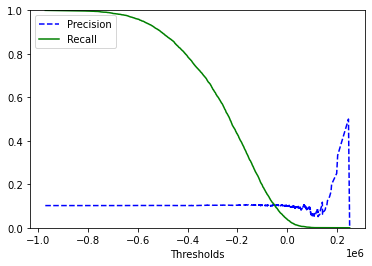

In [35]:
plt.plot(thresholds, precisions[:-1], "b--",label='Precision')
plt.plot(thresholds, recalls[:-1], "g-", label='Recall')
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()